# CONTRIBUTOR -PRATHAMESH

In [ ]:
# Importing libraries
import matplotlib.pyplot as plt
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

In [452]:
# Loading the data from the drive and saving it to Categories
DATADIR ="C:/akshay/Capstone/0 vs 1,2,3,4"
CATEGORIES = ['0','1,2,3,4']

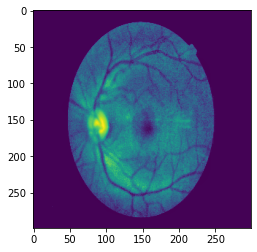

In [454]:
# a loop to read 1 image of a category to check if the code would work 
IMG_SIZE = 299
for category in CATEGORIES:
    path = os.path.join(DATADIR,category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img))
        new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
        image_bw = cv2.cvtColor(new_array, cv2.COLOR_BGR2GRAY)
        clahe = cv2.createCLAHE(clipLimit = 5)
        final_img = clahe.apply(image_bw)
        plt.imshow(final_img)
        plt.show()
        break
    break

In [455]:
# creating the training dataset using the images of all 5 categories

training_data = []
IMG_SIZE = 200
def create_training_data():  # function to create an array of images
    for category in CATEGORIES:
        path = os.path.join(DATADIR,category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            img_array = cv2.imread(os.path.join(path,img))
            try:
                new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE)) # resizing the image
                image_bw = cv2.cvtColor(new_array, cv2.COLOR_BGR2GRAY)
                clahe = cv2.createCLAHE(clipLimit = 8)
                img = clahe.apply(image_bw)
                final_img=cv2.cvtColor(img,cv2.COLOR_GRAY2RGB)
                
                #final_img = np.expand_dims(img, axis = -1)
            except:
                continue
            training_data.append([final_img,class_num])
            
create_training_data()


In [456]:
len(training_data)

3180

In [457]:
# empty lists to append images and labels
X = []
y = []

In [458]:
# appending images to list X and labels to list Y
for features,label in training_data:
    X.append(features)
    y.append(label)
X = np.array(X)

In [459]:
len(X),len(y)

(3180, 3180)

In [460]:
# normalising the data
X_train = X/255

In [461]:
# converting the train and test data into arrays
X_train = np.array(X_train)
y_train = y

In [462]:
#Laoding Val_Test data
DATADIR ="C:/akshay/Capstone/Val_Test(0 vs 1,2,3,4)"
CATEGORIES = ['0','1,2,3,4']

# creating the val_test dataset 
validation_data = []
IMG_SIZE = 200
def create_validation_data():  # function to create an array of images
    for category in CATEGORIES:
        path = os.path.join(DATADIR,category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            img_array = cv2.imread(os.path.join(path,img))
            try:
                new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE)) # resizing the image
                image_bw = cv2.cvtColor(new_array, cv2.COLOR_BGR2GRAY)
                clahe = cv2.createCLAHE(clipLimit = 5)
                final_img = clahe.apply(image_bw)
                final_img = cv2.cvtColor(final_img, cv2.COLOR_GRAY2BGR)
            except:
                continue
            validation_data.append([final_img,class_num])

create_validation_data()

In [463]:
# empty lists to append images and labels
X = []
y = []
# appending images to list X and labels to list Y
for features,label in validation_data:
    X.append(features)
    y.append(label)
X = np.array(X)

# normalising the data
X_test = X/255
y_test = y

# converting the train and test data into arrays
X_test = np.array(X_test)

In [464]:
X_test.shape

(557, 200, 200, 3)

In [465]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
import os
import zipfile
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop, Adam, SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
from tensorflow.keras import Model

In [466]:
pre_trained_model = InceptionV3(input_shape = (200, 200, 3), # Shape of our images
                                include_top = False, # Leave out the last fully connected layer
                                weights = 'imagenet')

In [467]:
last_layer = pre_trained_model.get_layer('mixed7') #Only use layers including and above 'mixed7'
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

last layer output shape:  (None, 10, 10, 768)


In [469]:
last_layer = pre_trained_model.get_layer('mixed5')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

# Flatten the output layer to 1 dimension
x = layers.Flatten()(last_output)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(1024, activation='relu')(x)
# Add a dropout rate of 0.2
x = layers.Dropout(0.2)(x)                  
# Add a final sigmoid layer for classification
x = layers.Dense  (1, activation='sigmoid')(x)           

model = Model( pre_trained_model.input, x) 

model.compile(optimizer = Adam(learning_rate=0.00005), 
              loss = 'binary_crossentropy', 
              metrics = ['acc'])

last layer output shape:  (None, 10, 10, 768)


In [471]:
model.fit(np.array(X_train), np.array(y_train), epochs=20)
#history = model.fit(
#            X_train,y_train)

Epoch 1/20
100/100 [==============================] - 342s 3s/step - loss: 0.1159 - acc: 0.9588
Epoch 2/20
100/100 [==============================] - 336s 3s/step - loss: 0.0210 - acc: 0.9931
Epoch 3/20
100/100 [==============================] - 335s 3s/step - loss: 0.0084 - acc: 0.9987
Epoch 4/20
100/100 [==============================] - 335s 3s/step - loss: 0.0138 - acc: 0.9953
Epoch 5/20
100/100 [==============================] - 335s 3s/step - loss: 0.0065 - acc: 0.9984
Epoch 6/20
100/100 [==============================] - 335s 3s/step - loss: 0.0176 - acc: 0.9956
Epoch 7/20
100/100 [==============================] - 334s 3s/step - loss: 0.0087 - acc: 0.9987
Epoch 8/20
100/100 [==============================] - 335s 3s/step - loss: 0.0109 - acc: 0.9978
Epoch 9/20
100/100 [==============================] - 335s 3s/step - loss: 0.0117 - acc: 0.9972
Epoch 10/20
100/100 [==============================] - 334s 3s/step - loss: 0.0273 - acc: 0.9921
Epoch 11/20
100/100 [==================

In [473]:
y_pred = model.predict(X_test)
y_pred[:20]

array([[1.5772203e-07],
       [1.4922299e-09],
       [1.8456603e-07],
       [2.5018625e-07],
       [1.3007148e-07],
       [2.6067604e-09],
       [1.2219961e-14],
       [1.2853771e-09],
       [2.8332664e-10],
       [7.5671380e-08],
       [2.8173462e-11],
       [4.2423101e-12],
       [9.3833528e-08],
       [4.2648263e-11],
       [4.2206709e-09],
       [3.3372319e-10],
       [2.5378909e-06],
       [7.3236657e-09],
       [1.2215186e-10],
       [1.4925003e-04]], dtype=float32)

In [474]:
y_pred_class=[]
for i in y_pred:
    if i>0.5:
        y_pred_class.append(1)
    else:
        y_pred_class.append(0) 

In [475]:
from sklearn.metrics import confusion_matrix , classification_report
print("Classification Report: \n", classification_report(y_test, y_pred_class))

Classification Report: 
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       367
           1       0.96      0.96      0.96       190

    accuracy                           0.97       557
   macro avg       0.97      0.97      0.97       557
weighted avg       0.97      0.97      0.97       557



In [476]:
confusion_matrix(y_test, y_pred_class)

array([[360,   7],
       [  8, 182]], dtype=int64)

In [199]:
y_pred_class

[0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,


In [472]:
model.save('prath_1.h5')